In [1]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import LeastSquares,UnbinnedNLL
from stats import toy_Gauss
import ipywidgets

In [2]:
def f(x):
    return 2*np.sin(.5*x + .78) + .8

In [3]:
x = [.5,2.5,4.5,6.5,8.5,10.5]

In [4]:
def TCL(mean,sigma,n=1000):
        '''toy normal distribution'''

        delta = np.sqrt(3*n)*sigma
        
        return np.average([ np.random.uniform(mean-delta , mean+delta) for j in range(n) ]) 

In [5]:
def gen_data(x,sigma):
    return [f(i) + TCL(mean=0,sigma=sigma) for i in x]

In [6]:
y = [f(i) for i in x]

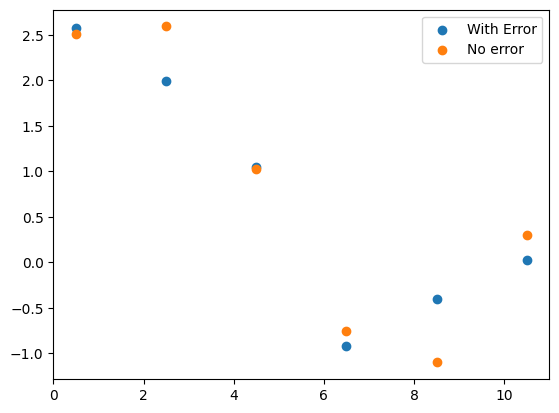

In [7]:
data = gen_data(x,0.3)
plt.scatter(x,data)
plt.scatter(x,y)
plt.legend(['With Error','No error'])
plt.show()

In [8]:
def func(x,p_o,p_1,p_2,p_3):
    return p_o*np.sin(p_1*x+p_2) + p_3

In [9]:
def fit(yerror,func):
    cost = LeastSquares(x,data,yerror,func)
    my_minuit = Minuit(cost, p_o=0,p_1=.5,p_2=0,p_3=0)
    my_minuit.interactive()

    my_minuit.migrad()
    my_minuit.hesse()
    # display(my_minuit)
    return my_minuit

In [10]:
fitted = fit(0.3, func)
print("Q squared: %f \nDegrees of freedom: %d" % (fitted.fval ,fitted.ndof))

Q squared: 4.675586 
Degrees of freedom: 2


In [11]:
def gen_data2(x,sigma1,sigma2):
    return [ ( 2*TCL(1,sigma1))*np.sin( (0.5*TCL(1,sigma1))*i + (0.78*TCL(1,sigma1)) ) + (0.8*TCL(1,sigma1)) + TCL(0,sigma2) for i in x]

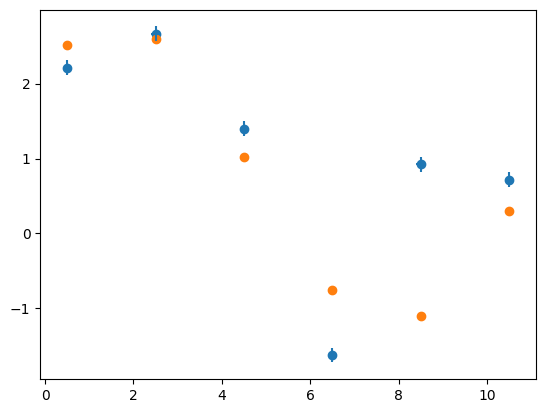

In [12]:
sigma1, sigma2 = .3, 0.1

data2 = gen_data2(x,sigma1,sigma2)
errors = (sigma1**2 + sigma2**2)* np.ones(len(data2))
plt.scatter(x,data2)
plt.scatter(x,y)
plt.errorbar(x,data2,errors,errors, linestyle= 'None')
plt.show()

(array([1.56939068, 1.57721443, 1.58503817, 1.59286192, 1.60068566,
        1.60850941, 1.61633315, 1.6241569 , 1.63198064, 1.63980439,
        1.64762813, 1.65545188, 1.66327562, 1.67109937, 1.67892311,
        1.68674686, 1.6945706 , 1.70239435, 1.71021809, 1.71804184,
        1.72586558, 1.73368933, 1.74151307, 1.74933682, 1.75716056,
        1.76498431, 1.77280805, 1.7806318 , 1.78845554, 1.79627929]),
 array([4.00767471e+00, 3.47234651e+00, 2.97543433e+00, 2.51691506e+00,
        2.09676521e+00, 1.71496078e+00, 1.37147724e+00, 1.06628952e+00,
        7.99524117e-01, 5.70777113e-01, 3.80276461e-01, 2.27984775e-01,
        1.13865352e-01, 3.78821876e-02, 0.00000000e+00, 1.84254373e-04,
        3.84011845e-02, 1.14617816e-01, 2.28801990e-01, 3.80922388e-01,
        5.70948551e-01, 7.98850910e-01, 1.06426755e+00, 1.36761023e+00,
        1.70864207e+00, 2.08730699e+00, 2.50354466e+00, 2.95728995e+00,
        3.44847228e+00, 3.97701487e+00]))

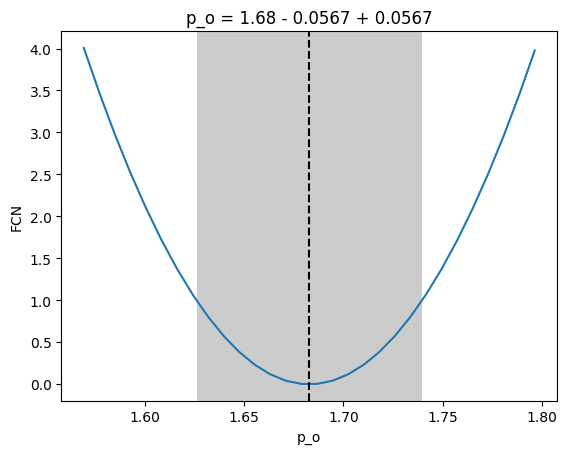

In [19]:
cost = LeastSquares(x,data,errors,func)
my_minuit = Minuit(cost, p_o=0,p_1=.5,p_2=0,p_3=0)
# my_minuit.interactive()
# my_minuit.migrad()
# my_minuit.draw_mnprofile("p_o")

In [ ]:
fitted2 = fit(errors[0], func)
display(fitted2)
print("Q squared: %f \nDegrees of freedom: %d" % (fitted2.fval ,fitted2.ndof))

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.528 (χ²/ndof = 0.8)      │              Nfcn = 148              │
│ EDM = 7.01e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ p_o  │   1.98    │   0.06    │            │            │         │         │       │
│ 1 │ p_1  │   0.513   │   0.010   │            │            │         │         │       │
│ 2 │ p_2  │   0.72    │   0.07    │            │            │         │         │       │
│ 3 │ p_3  │   0.70    │   0.04    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────┐
│     │      p_o      p_1      p_2      p_3 │
├─────┼─────────────────────────────────────┤
│ p_o │  0.00349  0.14e-3  -0.0009  -0.0002 │
│ p_1 │  0.14e-3 9.06e-05 -0.58e-3 -0.15e-3 │
│ p_2 │  -0.0009 -0.58e-3  0.00457   0.0010 │
│ p_3 │  -0.0002 -0.15e-3   0.0010  0.00191 │
└─────┴─────────────────────────────────────┘

Q squared: 1.528044 
Degrees of freedom: 2
